In [2]:
import pandas as pd
import numpy as np
import scipy.constants as const
import handcalcs.render
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math

# Расчетная часть

In [3]:
%%render
f_0  = 9.18*const.giga
lambda_0 = const.c/f_0 #в метрах
lambda_0 = round(lambda_0/const.milli,1) #в миллиметрах

<IPython.core.display.Latex object>

## Рупорная и рупорная с корректирующей линзой антенны

In [4]:
%%render
A = B = 50 #мм

<IPython.core.display.Latex object>

##### Ширина главного лепестка ДН в Е-плоскости

In [5]:
%%render
Theta_0_E = 2*lambda_0/B
Theta_05_E = 0.88*lambda_0/B

<IPython.core.display.Latex object>

In [6]:
round(math.degrees(Theta_0_E),2),round(math.degrees(Theta_05_E),2)

(74.94, 32.97)

##### Ширина главного лепестка ДН в H-плоскости

In [7]:
%%render
Theta_0_H = 3*lambda_0/A
Theta_05_H = 1.22*lambda_0/A

<IPython.core.display.Latex object>

In [8]:
round(math.degrees(Theta_0_H),2),round(math.degrees(Theta_05_H),2)

(112.41, 45.72)

##### Эффективная площадь

In [9]:
%%render
upsilon1 = upsilon2 = 0.78
upsilon = upsilon1*upsilon2
S_p = A*B
S_ef = S_p*upsilon
S_ef_l = S_p*upsilon2

<IPython.core.display.Latex object>

##### КНД

In [10]:
%%render
D_0 = 4*const.pi*S_ef/lambda_0**2
D_0_l = 4*const.pi*S_ef_l/lambda_0**2

<IPython.core.display.Latex object>

In [11]:
10*math.log10(D_0),10*math.log10(D_0_l)

(12.522435727545226, 13.601489700640421)

##### КПД

In [12]:
%%render
eta = 1 #принимают для удобства расчетов
#мб здесь что-то не так
eta_l = 0.9

<IPython.core.display.Latex object>

##### Коэффициент усиления

In [13]:
%%render
G_0 = D_0*eta
G_0_l = D_0_l*eta_l

<IPython.core.display.Latex object>

In [14]:
%%render
G_0 = 10*math.log10(G_0)#в дБ
G_0_l = 10*math.log10(G_0_l)#в дБ

<IPython.core.display.Latex object>

Минимальное расстояние до экрана

In [15]:
%%render
a_max = 50
#*const.milli
R_min = 2*2*a_max**2/(lambda_0)
R_1 = R_min/2

<IPython.core.display.Latex object>

Размер экрана

In [18]:
%%render
Theta_0 = max(Theta_0_H,Theta_0_E)/2
L_s = 2*R_1*math.tan(Theta_0)

<IPython.core.display.Latex object>

In [19]:
round(math.degrees(Theta_0),2)

56.21

## Диэлектрическая стержневая антенна

Расчет ДН

In [20]:
L = 15 #в сантиметрах
L = 150  #в миллиметрах 
Pavg = 1.1 #в методе

In [21]:
u_z = lambda Theta: const.pi*L/lambda_0*(Pavg - np.cos(Theta))
F_E = lambda Theta: np.cos(Theta)*np.sin(u_z(Theta))/u_z(Theta)
F_H = lambda Theta: np.sin(u_z(Theta))/u_z(Theta)

In [22]:
Theta_data = np.linspace(math.radians(-90),math.radians(90),int(1e4))#в радианах
Theta_grad_data = list(map(math.degrees,Theta_data)) #перевод в градусы
F_E_data = np.vectorize(F_E)(Theta_data)
F_H_data = np.vectorize(F_H)(Theta_data)

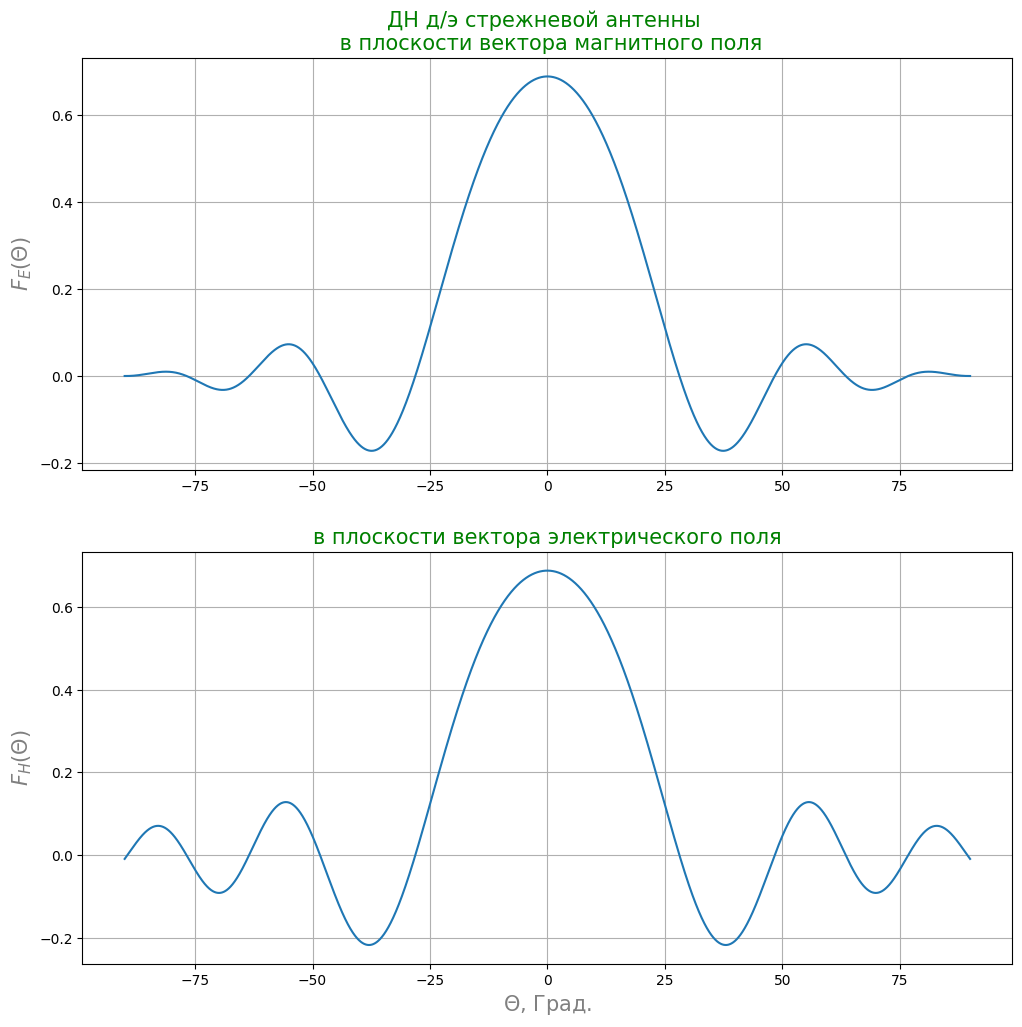

In [23]:

plt.figure(dpi = 100,figsize = (12,12))
#plt.ylim([xmin,xmax])

#axes.set_xlim([xmin,xmax])


plt.subplot(2,1,1)
plt.title("ДН д/э стрежневой антенны \n в плоскости вектора магнитного поля",
          fontsize=15,
         color = "green")
plt.ylabel("$F_E(\Theta)$", fontsize=15, color='gray')
plt.grid(True)
plt.plot(Theta_grad_data,F_E_data)

plt.subplot(2,1,2)
plt.title("в плоскости вектора электрического поля",
          fontsize=15,
         color = "green")
plt.ylabel("$F_H(\Theta)$", fontsize=15, color='gray')
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
plt.grid(True)
plt.plot(Theta_grad_data,F_H_data)


In [30]:
to_dB = lambda x: 20*math.log10(abs(x))
F_E_data_dB = np.vectorize(to_dB)(F_E_data)
F_H_data_dB = np.vectorize(to_dB)(F_H_data)

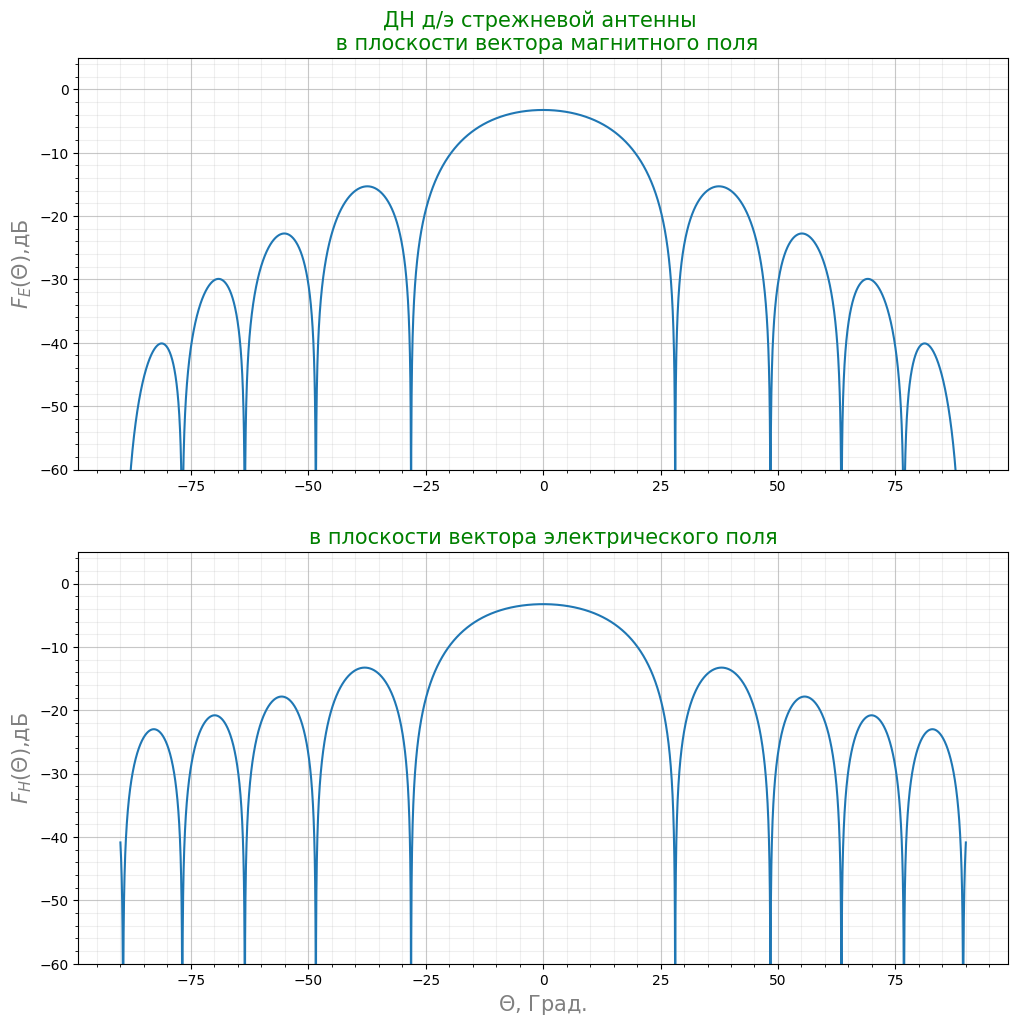

In [75]:

plt.figure(dpi = 100,figsize = (12,12))
#plt.ylim([xmin,xmax])

#axes.set_xlim([xmin,xmax])


plt.subplot(2,1,1)
plt.title("ДН д/э стрежневой антенны \n в плоскости вектора магнитного поля",
          fontsize=15,
         color = "green")
plt.ylabel("$F_E(\Theta)$,дБ", fontsize=15, color='gray')
plt.ylim(-60,5)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.7)
plt.plot(Theta_grad_data,F_E_data_dB)

plt.subplot(2,1,2)
plt.title("в плоскости вектора электрического поля",
          fontsize=15,
         color = "green")
plt.ylabel("$F_H(\Theta)$,дБ", fontsize=15, color='gray')
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
plt.ylim(-60,5)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.7)
plt.plot(Theta_grad_data,F_H_data_dB)

In [39]:
#Функция расчета ДН по уровню 0 и 0.5 и перевод в градусы
def Find_width_radiation_pattern(func,a,b):
    Theta_0_1 = math.degrees(opt.root(fun = func, x0 = math.radians(a))['x'][0])
    Theta_0_2 = math.degrees(opt.root(fun = func, x0 = math.radians(b))['x'][0])
    return Theta_0_1, Theta_0_2
def Find_width_radiation_pattern05(func,a,b):
    func_new = lambda x: func(x) - func(0)/math.sqrt(2)
    Theta_0_1 = math.degrees(opt.root(fun = func_new, x0 = math.radians(a))['x'][0])
    Theta_0_2 = math.degrees(opt.root(fun = func_new, x0 = math.radians(b))['x'][0])
    return Theta_0_1, Theta_0_2



class Find_width_radiation_pattern05():
    def __init__(self,func):
        self.func = func
        self.new_func = lambda x: func(x) - func(0)/math.sqrt(2)
    
    def Find_point_on_radiation_pattern_0(self,point_search):
        #принимает точку в град
        return (opt.root(fun = self.func, x0 = math.radians(point_search))['x'][0])
    def theta_0(self,point_search):
        #возвращает в град
        return math.degrees(self.Find_point_on_radiation_pattern_0(point_search))
    def func_val(self,point_search):
        return self.func(self.Find_point_on_radiation_pattern_0(point_search))
    
    def Find_point_on_radiation_pattern_05(self,point_search):
        #принимает точку в град
        return (opt.root(fun = self.new_func, x0 = math.radians(point_search))['x'][0])
    def theta_05(self,point_search):
        #возвращает в град
        return math.degrees(self.Find_point_on_radiation_pattern_05(point_search))
    def func_val_05(self,point_search):
        return self.func(self.Find_point_on_radiation_pattern_05(point_search))

##### Ширина главного лепестка ДН в Е-плоскости

In [40]:
Solv_F_E = Find_width_radiation_pattern05(F_E)

По 0 уровню

In [41]:
(Solv_F_E.theta_0(20) - Solv_F_E.theta_0(-20))

56.230857204694274

In [42]:
Solv_F_E.theta_05(20) - Solv_F_E.theta_05(-20)

28.689073590462954

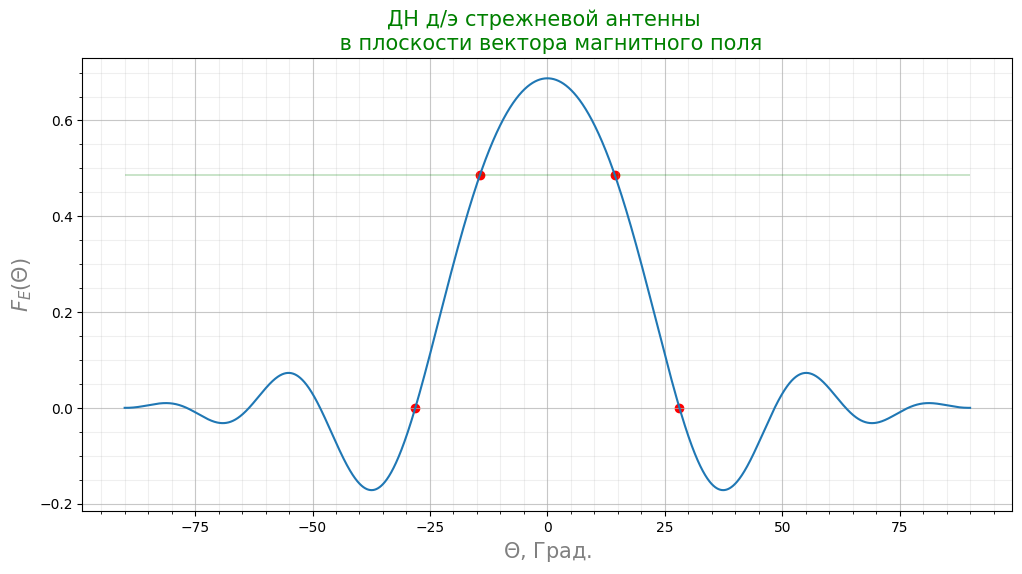

In [43]:
plt.figure(dpi = 100,figsize = (12,6))
#plt.ylim([xmin,xmax])

#axes.set_xlim([xmin,xmax])

plt.title("ДН д/э стрежневой антенны \n в плоскости вектора магнитного поля",
          fontsize=15,
         color = "green")
plt.scatter([Solv_F_E.theta_0(20),Solv_F_E.theta_0(-20)],
            [Solv_F_E.func_val(20),Solv_F_E.func_val(-20)],
           color = "red")
plt.scatter([Solv_F_E.theta_05(20),Solv_F_E.theta_05(-20)],
            [(Solv_F_E.func_val_05(20)),(Solv_F_E.func_val_05(-20))],
           color = "red")
plt.hlines(F_E(0)/math.sqrt(2),
           min(Theta_grad_data),
           max(Theta_grad_data),
          color = "green",
          linewidth = 0.3)
plt.ylabel("$F_E(\Theta)$", fontsize=15, color='gray')
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
#plt.grid(which='both')
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.7)
plt.plot(Theta_grad_data,F_E_data)

##### Ширина главного лепестка ДН в H-плоскости

In [44]:
Solv_F_H = Find_width_radiation_pattern05(F_H)

In [45]:
Solv_F_H.theta_0(20) - Solv_F_H.theta_0(-20)

56.23085720469689

In [46]:
Solv_F_H.theta_05(20) - Solv_F_H.theta_05(-20)

29.828492730011007

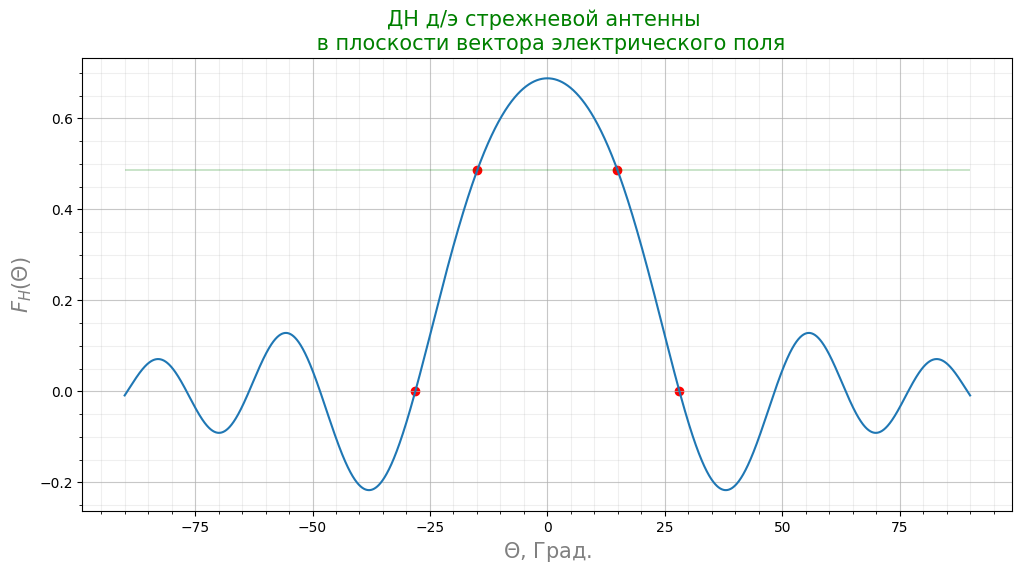

In [47]:
plt.figure(dpi = 100,figsize = (12,6))
#plt.ylim([xmin,xmax])

#axes.set_xlim([xmin,xmax])

plt.title("ДН д/э стрежневой антенны \n в плоскости вектора электрического поля",
          fontsize=15,
         color = "green")
plt.scatter([Solv_F_H.theta_0(20),Solv_F_H.theta_0(-20)],
            [Solv_F_H.func_val(20),Solv_F_H.func_val(-20)],
           color = "red")
plt.scatter([Solv_F_H.theta_05(20),Solv_F_H.theta_05(-20)],
            [(Solv_F_H.func_val_05(20)),(Solv_F_H.func_val_05(-20))],
           color = "red")
plt.hlines(F_E(0)/math.sqrt(2),
           min(Theta_grad_data),
           max(Theta_grad_data),
          color = "green",
          linewidth = 0.3)
plt.ylabel("$F_H(\Theta)$", fontsize=15, color='gray')
plt.xlabel('$\Theta$, Град.', fontsize=15, color='gray')
#plt.grid(which='both')
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.7)
plt.plot(Theta_grad_data,F_H_data)

##### КНД

In [48]:
%%render
k_D = 5 #лежит в интервале [4..6]
D_0 = k_D*L/lambda_0 #мм/мм

<IPython.core.display.Latex object>

In [49]:
10*math.log10(D_0)

13.605135107314139

##### КПД

In [50]:
%%render
K_alpha = 0.305
tan_delta = 1e-3
epsilon_r = 2.56
alpha = 27.29*epsilon_r*tan_delta*K_alpha/(lambda_0*const.milli)
eta = math.exp(-2*alpha*L*const.milli)

<IPython.core.display.Latex object>

##### Коэффициент усиления и эффективная площадь

In [51]:
%%render
G_0 = eta*D_0
S_ef = 1/(4*const.pi)*G_0*lambda_0**2 #мм^2

<IPython.core.display.Latex object>

In [52]:
10*math.log10(G_0)

12.756147885495983

In [76]:
%%render
a_max = 29
R_min = 2*2*a_max**2/(lambda_0)
R_1 = R_min/2

<IPython.core.display.Latex object>

Размер экрана

In [77]:
%%render
Theta_0 = max(Theta_0_H,Theta_0_E)/2
L_s = 2*R_1*math.tan(Theta_0)

<IPython.core.display.Latex object>

In [55]:
round(math.degrees(Theta_0),2)

56.21

# Экспериментальная часть

## 1. Рупорная антенна

In [56]:
%%render
KSW = np.sqrt(6.51/5.2) #КСВН

<IPython.core.display.Latex object>

In [57]:
#Рупорная антенна
data = {
    "Расстояние, на которое экран перемещен,мм":
              [160,163,166,169,173,176,179,182,186,189],
    "Umax,мВ":[6.7,7.1,7.8,7.6,6.8,6.6,7.2,7.3,6.8,6.8],
    "Umin,мВ":[4.8,4.2,4.1,4.2,4.8,4.8,4.2,4.2,4.8,4.6]
       }
horn_antenna = pd.DataFrame(data)
horn_antenna

,"Расстояние, на которое экран перемещен,мм","Umax,мВ","Umin,мВ"
0,160,6.7,4.8
1,163,7.1,4.2
2,166,7.8,4.1
3,169,7.6,4.2
4,173,6.8,4.8
5,176,6.6,4.8
6,179,7.2,4.2
7,182,7.3,4.2
8,186,6.8,4.8
9,189,6.8,4.6


In [58]:
horn_antenna["КСВН"] = round(np.sqrt(horn_antenna["Umax,мВ"]/horn_antenna["Umin,мВ"]),2)
#мВ/мВ
horn_antenna["G_oi"] = 4*np.pi*2*horn_antenna["Расстояние, на которое экран перемещен,мм"]/lambda_0 
#оставляем миллиметры
horn_antenna["G_oi"] = round(horn_antenna["G_oi"]*(horn_antenna["КСВН"] - 1)/(horn_antenna["КСВН"] + 1),2)
#возможна ошибка в формуле
horn_antenna

,"Расстояние, на которое экран перемещен,мм","Umax,мВ","Umin,мВ",КСВН,G_oi
0,160,6.7,4.8,1.18,10.15
1,163,7.1,4.2,1.30,16.34
2,166,7.8,4.1,1.38,20.37
3,169,7.6,4.2,1.35,19.35
4,173,6.8,4.8,1.19,11.54
5,176,6.6,4.8,1.17,10.60
6,179,7.2,4.2,1.31,18.46
7,182,7.3,4.2,1.32,19.29
8,186,6.8,4.8,1.19,12.40
9,189,6.8,4.6,1.22,14.40


In [59]:
#round(sum(horn_antenna["G_oi"])/len(horn_antenna["G_oi"]),2)
G_0 = round(horn_antenna["G_oi"].mean(),2)
G_0

15.29

In [60]:
round(10*np.log10(G_0),2)# в дБ

11.84

In [61]:
#S эффективная в мм^2
S_ef = 1/(4*np.pi)*G_0*(lambda_0)**2
round(S_ef,2)

1301.05

## 2. Рупорная антенна с корректирующей линзой

In [62]:
%%render
KSW= np.sqrt(2.2/2) #КСВН

<IPython.core.display.Latex object>

In [63]:
data = {
    "Расстояние, на которое экран перемещен,мм":
              [305.8,309,312.3,315.6,318.8,322.1,325.4,328.7,332,325.2],
    "Umax,мВ":[2.2  ,2.6,2.58 ,2.4  ,2.55 ,2.6  ,2.58 ,2.58 ,2.4,2.36 ],
    "Umin,мВ":[1.4  ,1.7,1.79 ,1.8  ,1.9  ,1.8  ,1.7  ,1.8  ,1.9,2    ]
       }
horn_antenna_with_corrective_lens = pd.DataFrame(data)
horn_antenna_with_corrective_lens

,"Расстояние, на которое экран перемещен,мм","Umax,мВ","Umin,мВ"
0,305.8,2.20,1.40
1,309.0,2.60,1.70
2,312.3,2.58,1.79
3,315.6,2.40,1.80
4,318.8,2.55,1.90
5,322.1,2.60,1.80
6,325.4,2.58,1.70
7,328.7,2.58,1.80
8,332.0,2.40,1.90
9,325.2,2.36,2.00


In [64]:
horn_antenna_with_corrective_lens["КСВН"] = round(np.sqrt(horn_antenna_with_corrective_lens["Umax,мВ"]/horn_antenna_with_corrective_lens["Umin,мВ"]),2)
#мВ/мВ
horn_antenna_with_corrective_lens["G_oi"] = 4*np.pi*2*horn_antenna_with_corrective_lens["Расстояние, на которое экран перемещен,мм"]/lambda_0 
#оставляем миллиметры
horn_antenna_with_corrective_lens["G_oi"] = round(horn_antenna_with_corrective_lens["G_oi"]*(horn_antenna_with_corrective_lens["КСВН"] - 1)/(horn_antenna_with_corrective_lens["КСВН"] + 1),2)
#возможна ошибка в формуле
horn_antenna_with_corrective_lens

,"Расстояние, на которое экран перемещен,мм","Umax,мВ","Umin,мВ",КСВН,G_oi
0,305.8,2.20,1.40,1.25,26.11
1,309.0,2.60,1.70,1.24,25.45
2,312.3,2.58,1.79,1.20,21.82
3,315.6,2.40,1.80,1.15,16.92
4,318.8,2.55,1.90,1.16,18.15
5,322.1,2.60,1.80,1.20,22.51
6,325.4,2.58,1.70,1.23,25.79
7,328.7,2.58,1.80,1.20,22.97
8,332.0,2.40,1.90,1.12,14.44
9,325.2,2.36,2.00,1.09,10.76


In [65]:
#round(sum(horn_antenna["G_oi"])/len(horn_antenna["G_oi"]),2)
G_0 = round(horn_antenna_with_corrective_lens["G_oi"].mean(),2)
G_0

20.49

In [66]:
round(10*np.log10(G_0),2)# в дБ

13.12

In [67]:
#S эффективная в мм^2
S_ef = 1/(4*np.pi)*G_0*(lambda_0)**2
round(S_ef,2)

1743.52

## 3. Диэлектрическая стержневая антенна

In [68]:
%%render
KSW= np.sqrt(2/1.3) #КСВН

<IPython.core.display.Latex object>

In [69]:
data = {
    "Расстояние, на которое экран перемещен,мм":
              [230,233.8,236.6,239.9,243.2,246.5,249.8,253.1,256.4,259.7],
    "Umax,мВ":[2.9,2.5  ,2.2  ,2.5  ,2.9  ,3    ,2.7  ,2.2  ,2.2  ,2.7  ],
    "Umin,мВ":[0.8,1.1  ,1.4  ,1.1  ,0.8  ,0.8  ,0.9  ,1.3  ,1.3  ,0.9  ]
       }
dielectric_antenna = pd.DataFrame(data)
dielectric_antenna

,"Расстояние, на которое экран перемещен,мм","Umax,мВ","Umin,мВ"
0,230.0,2.9,0.8
1,233.8,2.5,1.1
2,236.6,2.2,1.4
3,239.9,2.5,1.1
4,243.2,2.9,0.8
5,246.5,3.0,0.8
6,249.8,2.7,0.9
7,253.1,2.2,1.3
8,256.4,2.2,1.3
9,259.7,2.7,0.9


In [70]:
dielectric_antenna["КСВН"] = round(np.sqrt(dielectric_antenna["Umax,мВ"]/dielectric_antenna["Umin,мВ"]),2)
#мВ/мВ
dielectric_antenna["G_oi"] = 4*np.pi*2*dielectric_antenna["Расстояние, на которое экран перемещен,мм"]/lambda_0 
#оставляем миллиметры
dielectric_antenna["G_oi"] = round(dielectric_antenna["G_oi"]*(dielectric_antenna["КСВН"] - 1)/(dielectric_antenna["КСВН"] + 1),2)
#возможна ошибка в формуле
dielectric_antenna

,"Расстояние, на которое экран перемещен,мм","Umax,мВ","Umin,мВ",КСВН,G_oi
0,230.0,2.9,0.8,1.90,54.86
1,233.8,2.5,1.1,1.51,36.51
2,236.6,2.2,1.4,1.25,20.21
3,239.9,2.5,1.1,1.51,37.46
4,243.2,2.9,0.8,1.90,58.01
5,246.5,3.0,0.8,1.94,60.57
6,249.8,2.7,0.9,1.73,51.34
7,253.1,2.2,1.3,1.30,25.37
8,256.4,2.2,1.3,1.30,25.70
9,259.7,2.7,0.9,1.73,53.37


##### Коэффициент усиления и эффективная площадь

In [71]:
#round(sum(horn_antenna["G_oi"])/len(horn_antenna["G_oi"]),2)
G_0 = round(dielectric_antenna["G_oi"].mean(),2)
G_0

42.34

In [72]:
round(10*np.log10(G_0),2)# в дБ

16.27

In [73]:
#S эффективная в мм^2
S_ef = 1/(4*np.pi)*G_0*(lambda_0)**2
round(S_ef,2)

3602.77